In [3]:
# import the usual
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.integrate import quad
# constants
G = 6.67E-11 # m^3/kg/s^2
g = 9.81 # m/s^2
Me = 5.9E24 # kg
Mm = 7.3E22 # kg
Macm = 5500 # kg 
Re = 6378000 # m 
Rm = 1737000 # m
Dist_E_to_M = 3.8E8 # m
Ve_S1C = 2.4E3 # m/s
burn_rate_S1C = 1.3E4 # kg/s
wet_mass_S1C = 2.8E6 # kg
dry_mass_S1C = 7.5E5 # kg

Part 1: The Gravitational Potential of the Earth
------------------------------------------------ 



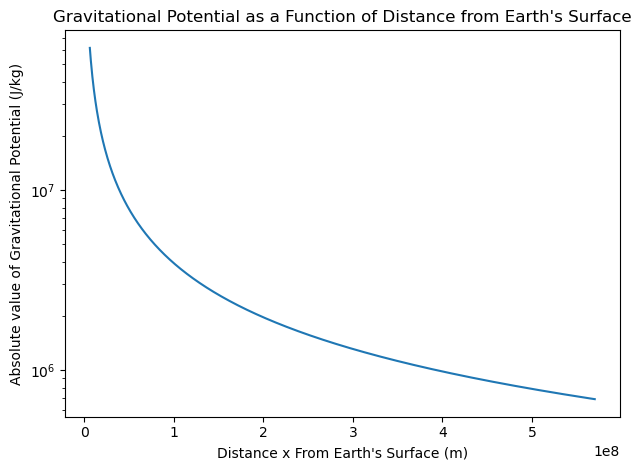

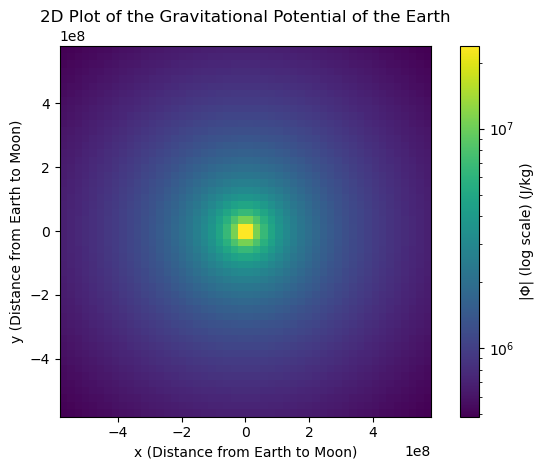

In [4]:
print("\033[1mPart 1: The Gravitational Potential of the Earth\033[0m")
print("------------------------------------------------", "\n")

# Number 1
def gravpot(M, xM, yM, x, y):
    # M = Mass of body 
    # xM = x cartesian coordinate of mass
    # yM = y cartesian coordinate of mass
    # x = x coordinate of distant evaluation point
    # y = y coordinate of distant evaluation point
    return -(G*M)/(np.sqrt((xM-x)**2 + (yM-y)**2))
x_vals = np.linspace(Re,5.7E8,1000)
Phi_vals = np.abs(gravpot(Me, 0, 0, x_vals, 0))

# Number 2
fig, ax = plt.subplots()
ax.plot(x_vals,Phi_vals)
ax.set_yscale("log")
ax.set_xlabel("Distance x From Earth's Surface (m)")
ax.set_ylabel("Absolute value of Gravitational Potential (J/kg)")
ax.set_title("Gravitational Potential as a Function of Distance from Earth's Surface");
fig.tight_layout()

# Number 3
xvalues = np.linspace(-1.5*Dist_E_to_M, 1.5*Dist_E_to_M, 50)
yvalues = np.linspace(-1.5*Dist_E_to_M, 1.5*Dist_E_to_M, 50)
X, Y = np.meshgrid(xvalues,yvalues)
Phi_values = np.abs(gravpot(Me, 0, 0, X, Y))

fig2, ax2 = plt.subplots()
norm = mcolors.LogNorm(vmin=Phi_values.min(), vmax=Phi_values.max())
colormesh = ax2.pcolormesh(X,Y,Phi_values,cmap='viridis', norm=norm,shading='auto')
ax2.set_xlabel('x (Distance from Earth to Moon)')
ax2.set_ylabel('y (Distance from Earth to Moon)')
ax2.set_title('2D Plot of the Gravitational Potential of the Earth');
ax2.set_aspect('equal')
cbar = fig2.colorbar(colormesh, ax=ax2)
cbar.set_label("|Φ| (log scale) (J/kg)")
fig2.tight_layout()

Part 2: The Gravitational Potential of the Earth-Moon System
------------------------------------------------------------ 



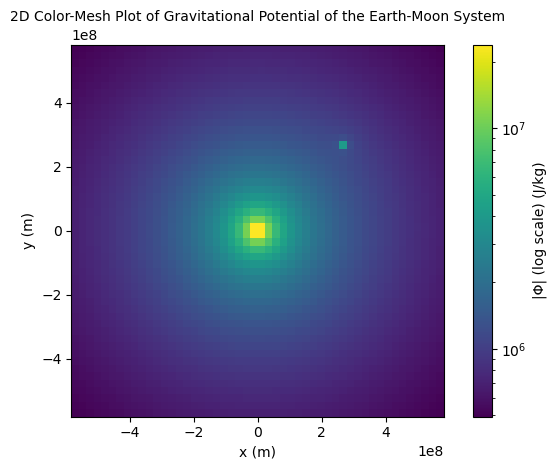

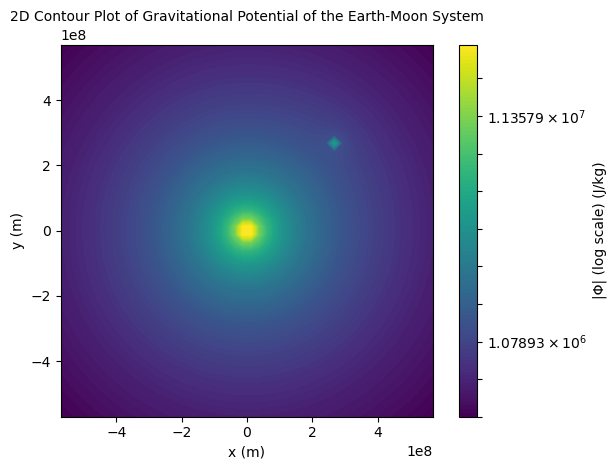

In [5]:
print("\033[1mPart 2: The Gravitational Potential of the Earth-Moon System\033[0m")
print("------------------------------------------------------------", "\n")

# Number 1
x_earth, y_earth = 0, 0
x_moon = Dist_E_to_M * np.sqrt(2)/2
y_moon = Dist_E_to_M * np.sqrt(2)/2

def gravpotcomb(Me, Mm, x_earth, y_earth, x_moon, y_moon, x, y):
    potential_earth = gravpot(Me, x_earth, y_earth, x, y)
    potential_moon = gravpot(Mm, x_moon, y_moon, x, y)
    return potential_earth + potential_moon

Z_earth_moon = np.array([[gravpotcomb(Me, Mm, 0, 0, x_moon, y_moon, x, y) 
                          for x, y in zip(X_row, Y_row)] for X_row, Y_row in zip(X, Y)])

fig3, ax3 = plt.subplots()
colormesh2 = ax3.pcolormesh(X,Y,np.abs(Z_earth_moon), norm=mcolors.LogNorm(vmin=np.min(np.abs(Z_earth_moon)), vmax=np.max(np.abs(Z_earth_moon))))
ax3.set_title("2D Color-Mesh Plot of Gravitational Potential of the Earth-Moon System",fontsize=10)
ax3.set_xlabel("x (m)")
ax3.set_ylabel("y (m)")
ax3.set_aspect('equal')
cbar2 = fig3.colorbar(colormesh2, ax=ax3)
cbar2.set_label("|Φ| (log scale) (J/kg)")
fig3.tight_layout()

# Number 2
fig4, ax4 = plt.subplots()
contour = ax4.contourf(X,Y,np.abs(Z_earth_moon),levels=np.logspace(np.log10(np.min(np.abs(Z_earth_moon))), np.log10(np.max(np.abs(Z_earth_moon))),100),norm=mcolors.LogNorm(vmin=np.min(np.abs(Z_earth_moon)), vmax=np.max(np.abs(Z_earth_moon))))
cbar3 = fig4.colorbar(contour, ax=ax4)
cbar3.set_label("|Φ| (log scale) (J/kg)")
ax4.set_title("2D Contour Plot of Gravitational Potential of the Earth-Moon System",fontsize=10)
ax4.set_xlabel("x (m)")
ax4.set_ylabel("y (m)")
ax4.set_aspect('equal')
fig4.tight_layout()

Part 3: The Gravitational Force Field of the Earth-Moon System
-------------------------------------------------------------- 



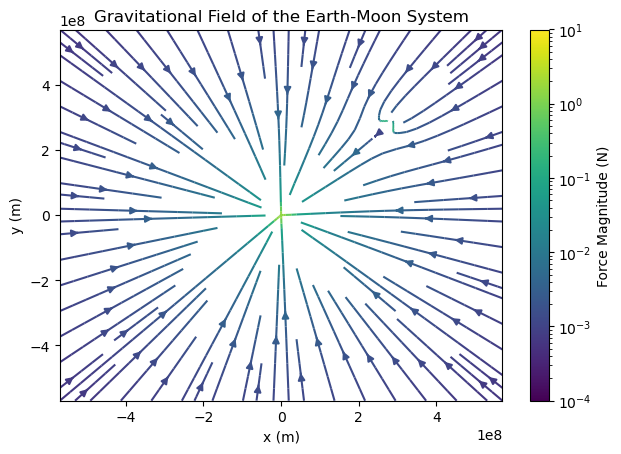

In [6]:
print("\033[1mPart 3: The Gravitational Force Field of the Earth-Moon System\033[0m")
print("--------------------------------------------------------------", "\n")

# Number 1
def Fgrav(M1, m2, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2-y1
    r_squared = dx**2 + dy**2
    r = np.sqrt(r_squared)
    r = np.where(r < 1E3, 1E3, r)
    force_magnitude = G * M1 * m2 / r_squared
    Fx = -force_magnitude * (dx/r)
    Fy = -force_magnitude * (dy/r)
    return Fx, Fy

# Number 2
grid_range = 1.5*Dist_E_to_M
x_valuess = np.linspace(-grid_range, grid_range, 50)
y_valuess = np.linspace(-grid_range, grid_range, 50)
X1, Y1 = np.meshgrid(x_valuess, y_valuess)

Fx_earth, Fy_earth = Fgrav(Me, 1, x_earth, y_earth, X1, Y1)
Fx_moon, Fy_moon = Fgrav(Mm, 1, x_moon, y_moon, X1, Y1)

Fx_total = Fx_earth + Fx_moon
Fy_total = Fy_earth + Fy_moon

force_magnitude = np.sqrt(Fx_total**2 + Fy_total**2)
log_force = np.log10(force_magnitude)

fig5, ax5 = plt.subplots()
strm = ax5.streamplot(X1, Y1, Fx_total, Fy_total, color=force_magnitude, norm=mcolors.LogNorm(vmin=1E-4, vmax=1E1), cmap='viridis')
cbar5 = fig5.colorbar(strm.lines, ax=ax5)
cbar5.set_label("Force Magnitude (N)")
ax5.set_xlabel("x (m)")
ax5.set_ylabel('y (m)')
ax5.set_title('Gravitational Field of the Earth-Moon System')
fig5.tight_layout()

In [7]:
print("\033[1mPart 4: Altitude of the Saturn V Rocket\033[0m")
print("---------------------------------------", "\n")

# Number 1
burn_time = (wet_mass_S1C - dry_mass_S1C)/burn_rate_S1C
print(f'The burn time T for the first stage of the new Saturn V rocket that NASA is planning to use to carry the Apollo capsule is {round(burn_time,3)} seconds.')

# Number 2
def delta_v(t,m0,mf,burn_rate,exhaust_speed,gravconst):
    mass_t = np.maximum(m0-burn_rate*t, mf)
    dv_end = exhaust_speed*np.log(m0/mf)-gravconst*burn_time
    dv = np.where(t<= burn_time, exhaust_speed * np.log(m0/mass_t) - gravconst*t, dv_end)
    return dv

t_values = np.linspace(0, burn_time, 10)
dvtest = delta_v(t_values, wet_mass_S1C, dry_mass_S1C, burn_rate_S1C, Ve_S1C, g)
print(f"\nDelta v at 10 different times from start to end is {dvtest} in meters per second.")

# Number 3
h, error = quad(delta_v, 0, burn_time, args=(wet_mass_S1C, dry_mass_S1C, burn_rate_S1C, Ve_S1C, g))
print(f"\nAltitude at burnout: {round(h, 3)} meters")

Part 4: Altitude of the Saturn V Rocket
--------------------------------------- 

The burn time T for the first stage of the new Saturn V rocket that NASA is planning to use to carry the Apollo capsule is 157.692 seconds.

Delta v at 10 different times from start to end is [   0.           31.75349818   82.40105892  155.81069691  257.17509957
  393.69539031  575.77234725  819.23708718 1149.9445322  1614.56203666] in meters per second.

Altitude at burnout: 74093.98 meters
